<a href="https://colab.research.google.com/github/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/blob/main/Modulo_08_Aprendizaje_Automatico/BA_EDA_Preprocesamiento_Modelo_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

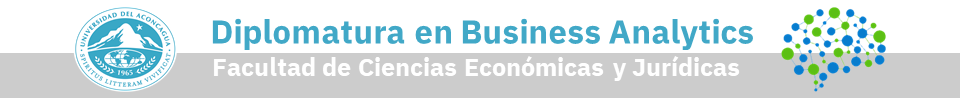

</center>

<center>
<font color="#41a8c7">
<h2><b>
Análisis Exploratorio de los Datos y Preprocesamiento de Datos 

</font>
</center>

# **Conjunto de Datos**

El conjunto de datos *SaratogaHouses* del paquete mosaicData de R contiene información sobre el precio de 1728 viviendas situadas en Saratoga County, New York, USA en el año 2006. Además del precio de las viviendas, el conjunto de datos incluye 15 variables adicionales:

- **price:** precio de la vivienda.
- **lotSize:** metros cuadrados de la vivienda.
- **age:** antigüedad de la vivienda.
- **landValue:** valor del terreno.
- **livingArea:** metros cuadrados habitables.
- **pctCollege:** porcentaje del vecindario con título universitario.
- **bedrooms:** número de dormitorios.
- **firplaces:** número de chimeneas.
- **bathrooms:** número de cuartos de baño (el valor 0.5 hace referencia a cuartos de baño sin ducha).
- **rooms:** número de habitaciones.
- **heating:** tipo de calefacción.
- **fuel:** tipo de alimentación de la calefacción (gas, electricidad o diesel).
- **sewer:** tipo de desagüe.
- **waterfront:** si la vivienda tiene vistas al lago.
- **newConstruction:** si la vivienda es de nueva construcción.
- **centralAir:** si la vivienda tiene aire acondicionado.

# **Carga de módulos y Datos necesarios**

In [1]:
import pandas as pd
import numpy as np

Antes que nada, se genera el dataframe con los datos que se utilizaran para la matriz de correlación


In [2]:
url = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_08_Aprendizaje_Automatico/SaratogaHouses.csv"

In [3]:
datos = pd.read_csv(url)
datos.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


Se cambian los nombres de las columnas para mejor interpretacion

In [4]:
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "baños", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]

# **Análisis Exploratorio de los Datos**

El Análisis Exploratorio de los Datos es  una exploración descriptiva del Conjunto de Datos. Este proceso permite entender  qué información contiene cada variable, así como detectar  errores. Algunos ejemplos frecuentes son:

- **Que una columna se haya almacenado con el tipo de dato incorrecto:** una variable numérica está siendo reconocida como texto o viceversa.
- **Que una variable contenga valores que no tienen sentido:** por ejemplo, para indicar que no se dispone del precio de una vivienda se introduce el valor 0 o un espacio en blanco.
- **Que en una variable de tipo numérico se haya introducido una palabra en lugar de un número.**

Además, el Análisis Exploratorio de los Datos puede dar pistas sobre qué variables son adecuadas como predictores en un modelo.

In [5]:
datos.head(4)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No


## **Tipos de Datos**

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   baños               1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

##**Dimensiones del DataFrame y valores ausentes**

Se debe conocer el número de observaciones disponibles y si  ellas están completas. Los valores ausentes son muy importantes a la hora de crear modelos, la mayoría de algoritmos no aceptan observaciones incompletas o bien se ven muy influenciados por ellas. 

***Aunque la imputación de valores ausentes*** es parte del preprocesado y, por lo tanto, debe de aprenderse únicamente con los datos de entrenamiento, su identificación se tiene que realizar antes de separar los datos para asegurar que se establecen todas las estrategias de imputación a utilizar.

In [7]:
datos.shape # Dimensión del DataFrame, 2 dimensiones

(1728, 16)

In [8]:
datos.size # Cantidad de celdas del DataFrame

27648

In [9]:
datos.isna().sum().sort_values() # Cantidad de datos ausentes por variable del DataFrame

precio                0
metros_totales        0
antiguedad            0
precio_terreno        0
metros_habitables     0
universitarios        0
dormitorios           0
chimenea              0
baños                 0
habitaciones          0
calefaccion           0
consumo_calefacion    0
desague               0
vistas_lago           0
nueva_construccion    0
aire_acondicionado    0
dtype: int64

##**Variable Objetivo o Variable Respuesta**

Es  importante estudiar la distribución de la variable objetivo o variable respuesta, ya que esta es la variable que interesa predecir. 

La variable precio tiene una distribución asimétrica positiva debido a que, unas pocas viviendas, tienen un precio muy superior a la media. Este tipo de distribución suele visualizarse mejor tras aplicar logaritmo o raíz cuadrada.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [11]:
fig = px.histogram(datos, x = datos.precio,
                   title="Distribución variable objetivo", 
                   color_discrete_sequence = ["red"], # color 
                   marginal="rug")
fig.show()

In [12]:
fig = px.histogram(datos, x = np.sqrt(datos.precio),
                   title="Transformación raíz cuadrada",
                   color_discrete_sequence = ["green"], # color 
                   marginal="rug")
fig.show()

In [13]:
fig = px.histogram(datos, x = np.log(datos.precio),
                   title="Transformación logarítmica", 
                   color_discrete_sequence = ["olive"], # color 
                   marginal="rug")
fig.show()

Algunos modelos de Machine Learning requieren que la variable objetivo se distribuya de una forma determinada. Por ejemplo, para los modelos de regresión lineal (LM), la distribución tiene que ser de tipo normal. Para otros modelos lineales, la distribución tiene que ser de la familia exponencial.

##**Variables numéricas** - Análisis descriptivo

In [14]:
round(datos.select_dtypes(include=["float64", "int"]).describe(),2)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,baños,habitaciones
count,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00
mean,211966.71,0.50,27.92,34557.19,1754.98,55.57,3.15,0.60,1.90,7.04
std,98441.39,0.70,29.21,35021.17,619.94,10.33,0.82,0.56,0.66,2.32
min,5000.00,0.00,0.00,200.00,616.00,20.00,1.00,0.00,0.00,2.00
25%,145000.00,0.17,13.00,15100.00,1300.00,52.00,3.00,0.00,1.50,5.00
50%,189900.00,0.37,19.00,25000.00,1634.50,57.00,3.00,1.00,2.00,7.00
75%,259000.00,0.54,34.00,40200.00,2137.75,64.00,4.00,1.00,2.50,8.25
max,775000.00,12.20,225.00,412600.00,5228.00,82.00,7.00,4.00,4.50,12.00


In [15]:
fig = px.histogram(datos, x = datos.metros_totales,
                   title="Metros totales",
                   color_discrete_sequence = ["blue"])
fig.show()

In [16]:
fig = px.histogram(datos, x = datos.precio_terreno,
                   color_discrete_sequence = ["darkorange"],
                   title="Precio Terreno")
fig.show()

In [17]:
fig = px.histogram(datos, x = datos.antiguedad,
                   color_discrete_sequence = ["black"],
                   title="Antiguedad")
fig.show()

In [18]:
fig = px.histogram(datos, x = datos.metros_habitables,
                   title="Metros habitables",
                   color_discrete_sequence = ["magenta"])
fig.show()

In [19]:
fig = px.histogram(datos, x = datos.universitarios,
                   title="Universitarios",
                   color_discrete_sequence = ["darkviolet"])
fig.show()

In [20]:
fig = px.histogram(datos, x = datos.dormitorios,
                   color_discrete_sequence = ["turquoise"],
                   title="Dormitorios")
fig.show()

In [21]:
fig = px.histogram(datos, x = datos.chimenea,
                   color_discrete_sequence = ["deeppink"],
                   title="Chimeneas")
fig.show()

In [22]:
fig = px.histogram(datos, x = datos.baños,
                   color_discrete_sequence = ["silver"],
                   title="Baños")
fig.show()

In [23]:
fig = px.histogram(datos, x = datos.habitaciones,
                   color_discrete_sequence = ["brown"],
                   title="Habitaciones")
fig.show()

La variable chimenea, aunque es de tipo numérico, apenas toma unos pocos valores y la gran mayoría de observaciones pertenecen a solo dos de ellos. En casos como este, suele ser conveniente tratar la variable como cualitativa.

In [24]:
datos.chimenea.value_counts()

1    942
0    740
2     42
4      2
3      2
Name: chimenea, dtype: int64

In [25]:
datos.chimenea = datos.chimenea.astype("str")

Como el objetivo del estudio es predecir el precio de las viviendas, el análisis de cada variable se hace también en relación a la variable objetivo precio. Analizando los datos de esta forma, se pueden empezar a extraer ideas sobre qué variables están más relacionadas con el precio y de qué forma.

##**Correlación de las variables numéricas**

In [26]:
corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')

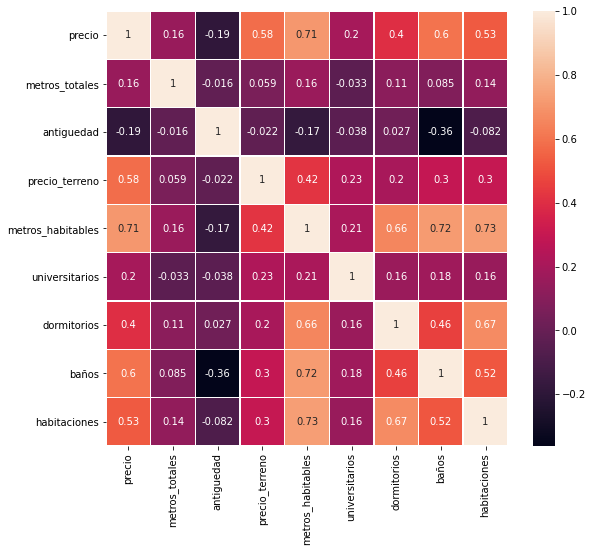

In [27]:
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix, 
            annot=True,
            linewidths=.5)

plt.show()

##**Variables cualitativas** - Análisis descriptivo

In [28]:
datos.select_dtypes(include=["object"]).describe()

,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1728,1728,1728,1728,1728,1728,1728
unique,5,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,942,1121,1197,1213,1713,1647,1093


Si alguno de los niveles de una variable cualitativa tiene muy pocas observaciones en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores. 

En estos casos, suele ser conveniente:
- Eliminar las observaciones del grupo minoritario si es una variable multiclase.
- Eliminar la variable si solo tiene dos niveles.
- Agrupar los niveles minoritarios en un único grupo.
- Asegurar que, en la creación de las particiones, todos los grupos estén representados en cada una de ellas.

Para este caso, hay que tener precaución con la variable chimenea.

In [29]:
fig = px.histogram(datos, x = datos.chimenea,
                   title="Chimenea")

fig.update_layout(bargap=0.2)
fig.show()

In [30]:
fig = px.histogram(datos, x = datos.calefaccion,
                   title="Calefaccion")
fig.show()

In [31]:
fig = px.histogram(datos, x = datos.consumo_calefacion,
                   title="Consumo Calefaccion")
fig.show()

In [32]:
fig = px.histogram(datos, x = datos.desague,
                   title="Desague")
fig.show()

In [33]:
fig = px.histogram(datos, x = datos.vistas_lago,
                   title="Vistas al Lago")
fig.show()

In [34]:
fig = px.histogram(datos, x = datos.aire_acondicionado,
                   title="Aire Acondicionado")
fig.show()

##**División del Conjunto de Datos en train y test**


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(datos.drop('precio', axis = 'columns'),
                                                    datos['precio'],train_size   = 0.8,
                                                    random_state = 2021, shuffle = True)

In [37]:
X_train.shape

(1382, 15)

In [38]:
X_test.shape

(346, 15)

In [39]:
y_train.shape

(1382,)

In [40]:
y_test.shape

(346,)

# **Preprocesamiento de los Datos**

El preprocesamiento de los Datos tiene que ver con todas las transformaciones realizadas sobre los datos con el objetivo de que puedan ser interpretados por el algoritmo de machine learning lo más eficientemente posible. 

*Todo preprocesado de datos debe aprenderse con las observaciones de entrenamiento y luego aplicarse al conjunto de entrenamiento y al de test.*

Esto es muy importante para no violar la condición de que ninguna información procedente de las observaciones de test participe o influya en el ajuste del modelo. 

A continuación se resumen algunos de los pasos de preprocesado que más se suelen necesitar.

## **Imputación de valores ausentes**

La gran mayoría de algoritmos no aceptan observaciones incompletas, por lo tanto, cuando el conjunto de datos contiene valores ausentes, se puede:

- Eliminar aquellas observaciones que estén incompletas.
- Eliminar aquellas variables que contengan valores ausentes.
- Tratar de estimar los valores ausentes empleando el resto de información disponible (lo que se conoce como imputación).

## **Exclusión de variables con varianza cercana a cero**

No se deben incluir en el modelo variables que contengan un único valor (cero-varianza) ya que no aportan información. Tampoco es conveniente incluir variables que tengan una varianza próxima a cero, es decir, variables que toman solo unos pocos valores, de los cuales, algunos aparecen con muy poca frecuencia. 

El problema con estos últimos es que pueden convertirse en variables con varianza cero cuando se dividen las observaciones por validación cruzada.

## **Estandarización y escalado de variables numéricas**

La escala en la que se miden las variables, así como la magnitud de su varianza pueden influir en gran medida en el modelo a desarrollar. Muchos algoritmos de machine learning son sensibles a esto, de forma que, si no se igualan las variables, aquellas que se midan en una escala mayor o que tengan más varianza dominarán el modelo aunque no sean las que más relación tienen con la variable objetivo, o variable explicativa. 

Existen principalmente 2 estrategias para evitar esta situación:

- **Centrado:** consiste en restarle a cada valor de la variable, la media del conjunto de valores de esa variable. Si los datos están almacenados en un dataframe, el centrado se consigue restándole a cada valor la media de la columna en la que se encuentra. Como resultado de esta transformación, todas las variables pasan a tener una media de cero, es decir, los valores se centran en torno al origen.
- **Normalización (estandarización):** consiste en transformar los datos de forma que todos las variables estén aproximadamente en la misma escala.

##**Binarización de las variables cualitativas** - Variables no numéricas

La binarización (one-hot-encoding) consiste en crear nuevas variables dummy con cada uno de los niveles de las variables cualitativas. Por ejemplo, una variable llamada suel que contenga los niveles alto, medio y bajo, se convertirá en tres nuevas variables (sueldo_alto, sueldo_medio, sueldo_bajo), todas con el valor 0 excepto la que coincide con la observación, que toma el valor 1.

Por defecto, OneHotEncoder binariza todas las variables, por lo que hay que aplicarlo únicamente a las variables cualitativas.

##**Pipeline y ColumnTransformer**

Pipeline y ColumnTransformer permiten combinar múltiples transformaciones de preprocesado, especificando a qué columnas se aplica cada una. 

Esto permite que el aprendizaje de las transformaciones se haga únicamente con observaciones de entrenamiento, y se puedan aplicar después a cualquier conjunto de datos. 

In [ ]:
pip install -U scikit-learn

In [41]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

In [42]:
numeric_cols = X_train.select_dtypes(include=["float64", "int"]).columns.to_list()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.to_list()

In [43]:
preprocesamiento = ColumnTransformer(
                   [("scale", StandardScaler(), numeric_cols),
                    ("onehot", OneHotEncoder(handle_unknown="ignore"), cat_cols)],
                   remainder="passthrough")

Una vez definido el objeto ColumnTransformer, con el método fit() se aplican las transformaciones a los datos de entrenamiento y se aplican a los dos conjuntos con la función transform(), de la siguiente manera:


In [44]:
X_train_prep = preprocesamiento.fit_transform(X_train)
X_test_prep  = preprocesamiento.transform(X_test)

El resultado devuelto por ColumnTransformer es un array de numpy, por lo tanto se pierden los nombres de las columnas que tenían en el dataframe. 

Suele ser interesante poder inspeccionar cómo queda el set de datos tras el preprocesado en formato dataframe. 

Por defecto, OneHotEncoder ordena las nuevas columnas de izquierda a derecha por orden alfabético.

In [45]:
encoded_cat = preprocesamiento.named_transformers_["onehot"].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocesamiento.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   metros_totales               1382 non-null   float64
 1   antiguedad                   1382 non-null   float64
 2   precio_terreno               1382 non-null   float64
 3   metros_habitables            1382 non-null   float64
 4   universitarios               1382 non-null   float64
 5   dormitorios                  1382 non-null   float64
 6   baños                        1382 non-null   float64
 7   habitaciones                 1382 non-null   float64
 8   chimenea_0                   1382 non-null   float64
 9   chimenea_1                   1382 non-null   float64
 10  chimenea_2                   1382 non-null   float64
 11  chimenea_3                   1382 non-null   float64
 12  chimenea_4                   1382 non-null   float64
 13  calefaccion_electr

ColumnTransformer aplica las operaciones de forma paralela, no de forma secuencial, esto significa que no permite aplicar más de una transformación a una misma columna. En el caso de que sea necesario hacerlo, hay que recurrir a los pipeline, que también agrupan operaciones pero las ejecutan de forma secuencial, de forma que la salida de una operación es la entrada de la siguiente. Si se quieren aplicar varias transformaciones de preprocesado sobre una misma columna, es necesario agruparlas primero en un pipeline.

**En el siguiente ejemplo se combinan las transformaciones:**

- **Columnas numéricas:** se imputan los valores ausentes con la mediana y a continuación se procede a la estandarización.
- **Columnas categóricas (cualitativas):** se imputan los valores ausentes con el valor más frecuente y a continuación se aplica OneHotEncoding.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

In [47]:
numeric_cols = X_train.select_dtypes(include=["float64", "int"]).columns.to_list()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.to_list()

### Transformación para las variables numéricas

In [48]:
numeric_transformer = Pipeline(
                        steps=[("imputer", SimpleImputer(strategy="median")),
                               ("scaler", StandardScaler())])

### Transformación para las variables categóricas

In [49]:
categorical_transformer = Pipeline(
                            steps=[("imputer", SimpleImputer(strategy="most_frequent")),
                                   ("onehot", OneHotEncoder(handle_unknown="ignore"))])

###Preprocesamiento

In [50]:
preprocesamiento = ColumnTransformer(
                    transformers=[('numeric', numeric_transformer, numeric_cols),
                                  ('cat', categorical_transformer, cat_cols)],
                    remainder='passthrough')

In [51]:
X_train_prep = preprocesamiento.fit_transform(X_train)
X_test_prep  = preprocesamiento.transform(X_test)

In [52]:
encoded_cat = preprocesamiento.named_transformers_['cat']['onehot']\
              .get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocesamiento.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   metros_totales               1382 non-null   float64
 1   antiguedad                   1382 non-null   float64
 2   precio_terreno               1382 non-null   float64
 3   metros_habitables            1382 non-null   float64
 4   universitarios               1382 non-null   float64
 5   dormitorios                  1382 non-null   float64
 6   baños                        1382 non-null   float64
 7   habitaciones                 1382 non-null   float64
 8   chimenea_0                   1382 non-null   float64
 9   chimenea_1                   1382 non-null   float64
 10  chimenea_2                   1382 non-null   float64
 11  chimenea_3                   1382 non-null   float64
 12  chimenea_4                   1382 non-null   float64
 13  calefaccion_electr

### Pipeline

A partir de las versión scikit-learn 0.23 se puede crear una representación interactiva de un objeto pipeline.


In [53]:
sklearn.__version__

'0.24.2'

In [56]:
from sklearn import set_config
set_config(display='diagram')

preprocesamiento

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['metros_totales', 'antiguedad',
                                  'precio_terreno', 'metros_habitables',
                                  'universitarios', 'dormitorios', 'baños',
                                  'habitaciones']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['chimenea', 'calefaccion',
                                  'consumo_calefacion', 'desague',
                                  'vistas_lago', 'nueva_construccion',
                                  'aire_acondicionado'])])